# Import Important Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

## Helper Functions

In [2]:
def visualize_missing_values(col_names,col_missing_values):
    plt.bar(x=col_names,height=col_missing_values)
    plt.xlabel('Column Name')
    plt.ylabel('Number of Missing Values')
    plt.show()

## Load data files

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Perform EDA (Exploratory Data Analysis) on Training Data

In [4]:
print("The shape of training data is:",train.shape)

The shape of training data is: (891, 12)


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


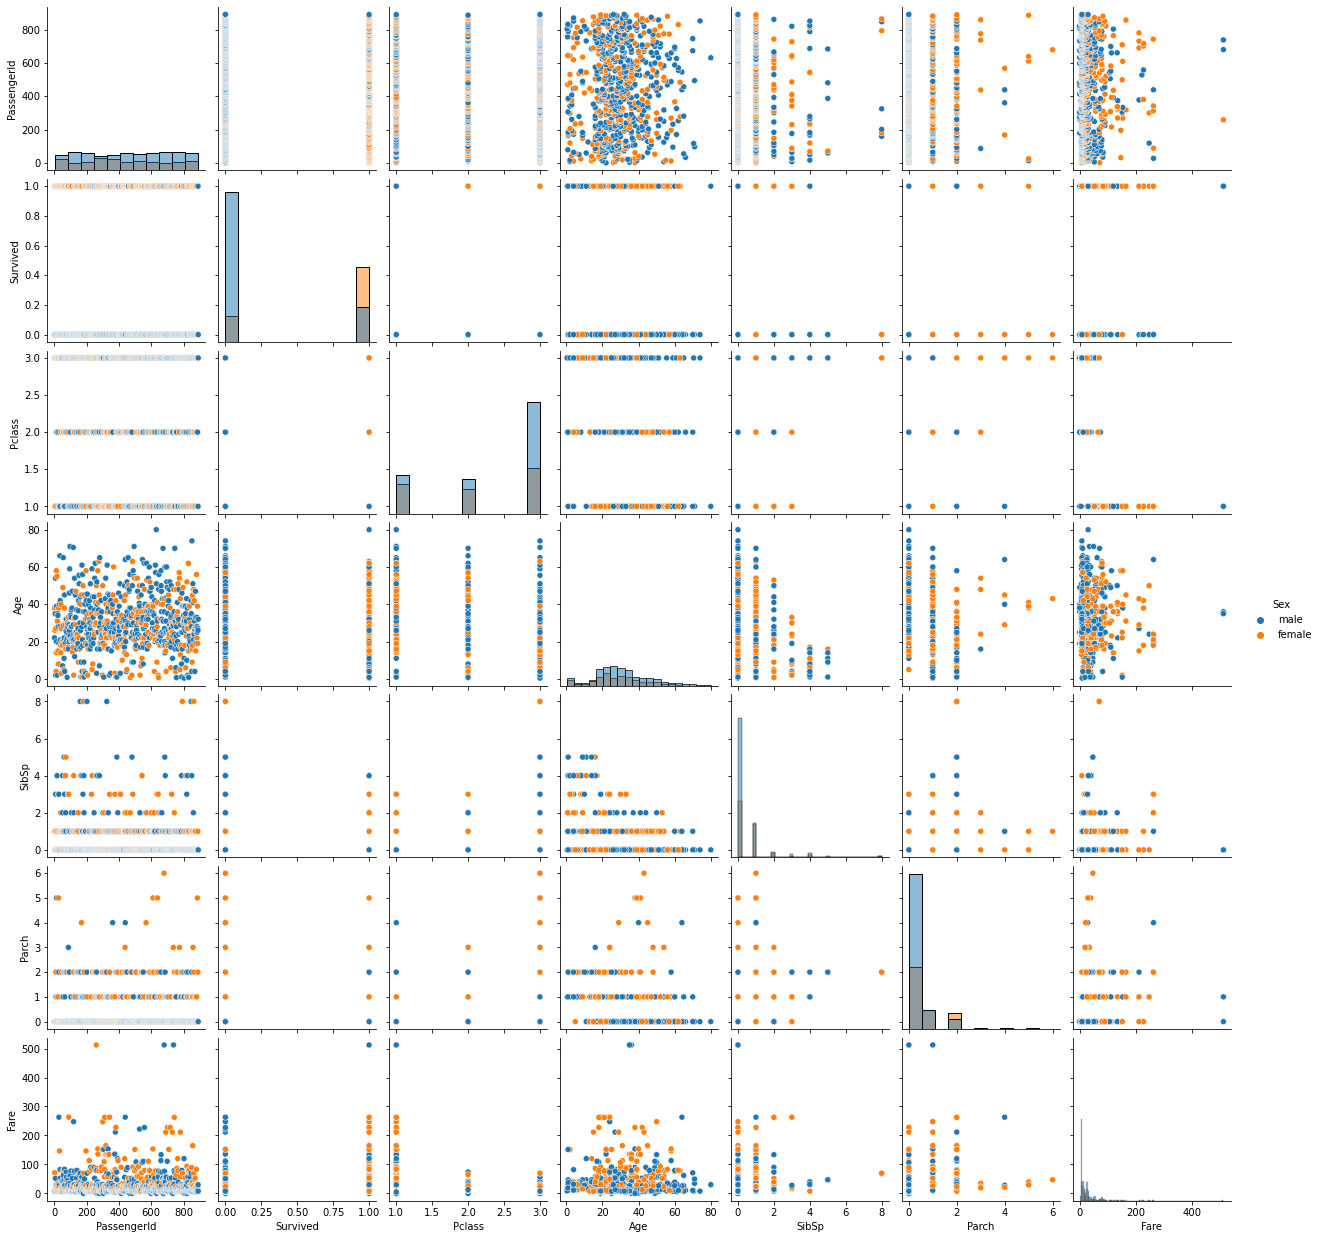

In [9]:
sns.pairplot(train,diag_kind='hist',hue='Sex')

In [10]:
print(train.corr())

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


## Perform EDA (Exploratory Data Analysis) on Testing Data

In [11]:
print("The shape of testing data is:",test.shape)

The shape of testing data is: (418, 11)


In [12]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [13]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [14]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


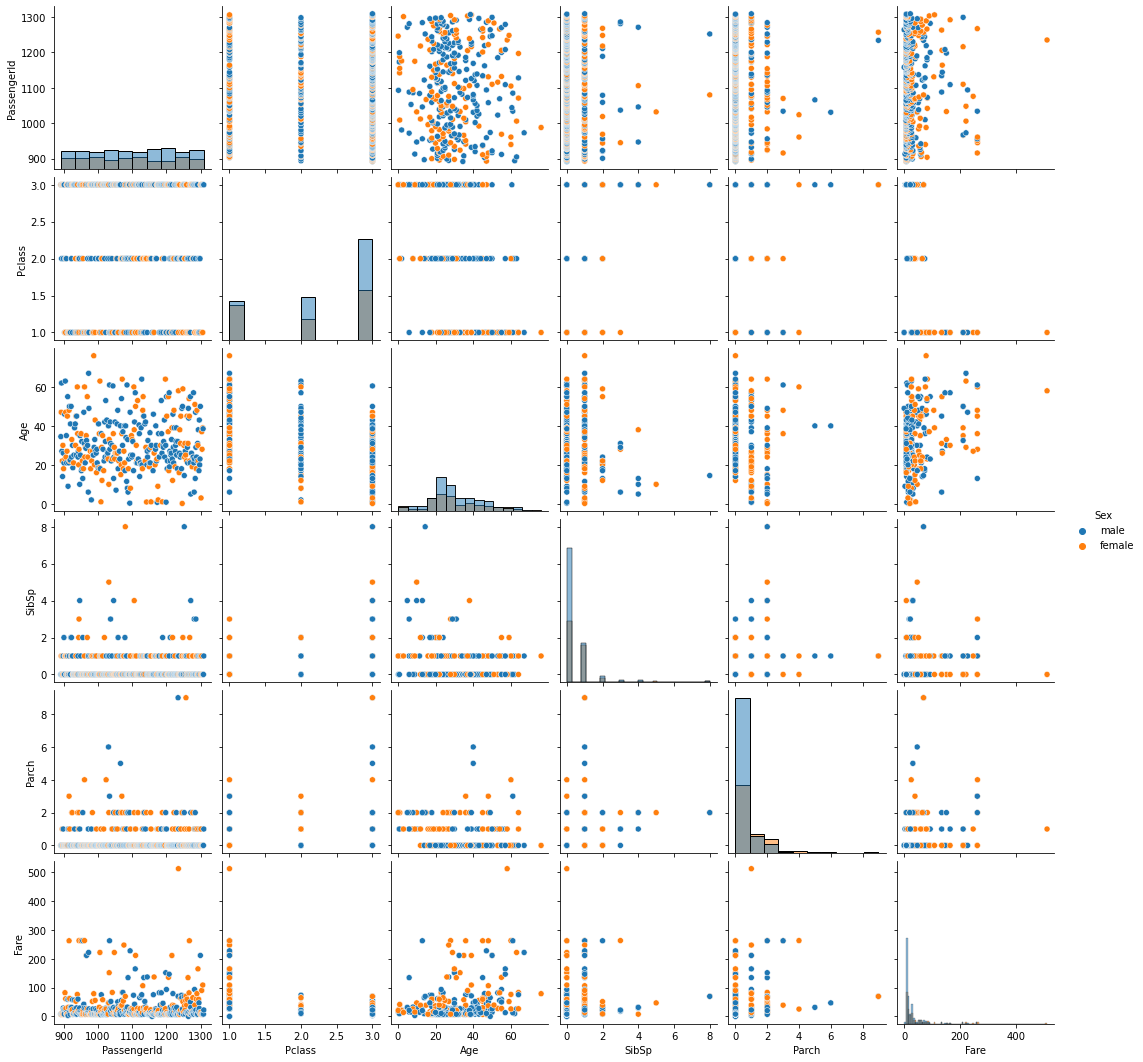

In [16]:
sns.pairplot(test,diag_kind='hist',hue='Sex')

In [17]:
print(test.corr())

             PassengerId    Pclass       Age     SibSp     Parch      Fare
PassengerId     1.000000 -0.026751 -0.034102  0.003818  0.043080  0.008211
Pclass         -0.026751  1.000000 -0.492143  0.001087  0.018721 -0.577147
Age            -0.034102 -0.492143  1.000000 -0.091587 -0.061249  0.337932
SibSp           0.003818  0.001087 -0.091587  1.000000  0.306895  0.171539
Parch           0.043080  0.018721 -0.061249  0.306895  1.000000  0.230046
Fare            0.008211 -0.577147  0.337932  0.171539  0.230046  1.000000


## Preprocessing for Trainig Data

### Visualize and Count Missing Values in columns in Training Data

In [18]:
train_missing_values = []
for col in train.columns:
    train_missing_values.append(train[col].isnull().sum())
    print(col,"has",train[col].isnull().sum(),"missing values")

PassengerId has 0 missing values
Survived has 0 missing values
Pclass has 0 missing values
Name has 0 missing values
Sex has 0 missing values
Age has 177 missing values
SibSp has 0 missing values
Parch has 0 missing values
Ticket has 0 missing values
Fare has 0 missing values
Cabin has 687 missing values
Embarked has 2 missing values


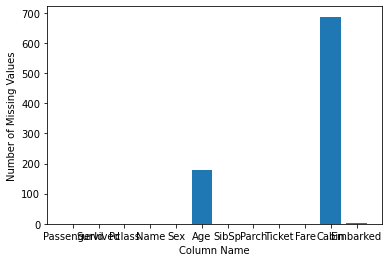

In [19]:
visualize_missing_values(train.columns,train_missing_values)

#### It seems that cabin has highest missing values so it will not be useful in our model so we will drop this column due to the number of missing values of it plus we will drop the name columns as we don't need it in the model too

In [20]:
# drop Cabin column
train = train.drop('Cabin',axis=1)
# drop Name column
train = train.drop('Name',axis=1)
# drop ticket column
train = train.drop('Ticket',axis=1)
# drop PassengerId column
train = train.drop('PassengerId',axis=1)

#### Fill in missing value using the imputaion technique, as we will do two simpleimputer objects one for categorical and another for numerical columns

In [21]:
## Numerical SimpleImputer
numerical_imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
## Categorical SimpleImputer
categorical_imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

In [22]:
## impute Age column
Age_Imputed = pd.DataFrame(numerical_imputer.fit_transform(train[['Age']]),index=train[['Age']].index,columns=['Age_Imputed'])
train = pd.concat([train,Age_Imputed],axis=1)
## remove Age column and replace it with Age_Imputed
train = train.drop('Age',axis=1)

In [23]:
## impute Embarked column
Embarked_Imputed = pd.DataFrame(categorical_imputer.fit_transform(train[['Embarked']]),index=train[['Embarked']].index,columns=['Embarked_Imputed'])
train = pd.concat([train,Embarked_Imputed],axis=1)
## remove Embarked column and replace it with Embarked_Imputed
train = train.drop('Embarked',axis=1)

#### Convert Categorical features into numerical features using OneHotEncoding method

In [24]:
# identify catgorical columns
categorical_mask = (train.dtypes == object)
categorical_columns = []
for col , mask in zip(train.columns,categorical_mask):
    if mask == True:
        categorical_columns.append(col)
categorical_columns
## convert categorical columns into numerical
train = pd.get_dummies(train)

#### Scaling the training data

In [25]:
scaler = StandardScaler()
fare_age_scaled = pd.DataFrame(scaler.fit_transform(train[['Fare','Age_Imputed']]),index=train.index,columns=['Fare','Age_Imputed'])
train = train.drop(['Age_Imputed','Fare'],axis=1)
train = pd.concat([train,fare_age_scaled],axis=1)

#### View of Training Data after the end of preprocessing

In [26]:
train.head()

,Survived,Pclass,SibSp,Parch,Sex_female,Sex_male,Embarked_Imputed_C,Embarked_Imputed_Q,Embarked_Imputed_S,Fare,Age_Imputed
0,0,3,1,0,0,1,0,0,1,-0.502445,-0.592481
1,1,1,1,0,1,0,1,0,0,0.786845,0.638789
2,1,3,0,0,1,0,0,0,1,-0.488854,-0.284663
3,1,1,1,0,1,0,0,0,1,0.420730,0.407926
4,0,3,0,0,0,1,0,0,1,-0.486337,0.407926


## Preprocessing for Test Data

### Visualize and Count Missing Values in columns in Testing Data

In [27]:
test_missing_values = []
for col in test.columns:
    test_missing_values.append(test[col].isnull().sum())
    print(col,"has",test[col].isnull().sum(),"missing values")

PassengerId has 0 missing values
Pclass has 0 missing values
Name has 0 missing values
Sex has 0 missing values
Age has 86 missing values
SibSp has 0 missing values
Parch has 0 missing values
Ticket has 0 missing values
Fare has 1 missing values
Cabin has 327 missing values
Embarked has 0 missing values


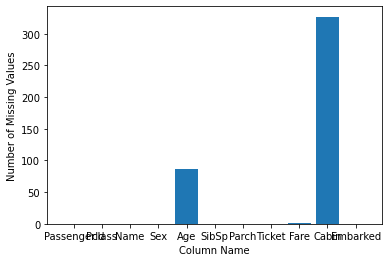

In [28]:
visualize_missing_values(test.columns,test_missing_values)

#### It seems that cabin has highest missing values so it will not be useful in our model so we will drop this column due to the number of missing values of it plus we will drop the name columns as we don't need it in the model too

In [29]:
# drop Cabin column
test = test.drop('Cabin',axis=1)
# drop Name column
test = test.drop('Name',axis=1)
# drop Ticket column
test = test.drop('Ticket',axis=1)
# drop PassengerId column
PassngerId = test[['PassengerId']]
test = test.drop('PassengerId',axis=1)

#### Apply Transformation of the above Imputers into Test Data

In [30]:
## impute Age column
Age_Imputed = pd.DataFrame(numerical_imputer.transform(test[['Age']]),index=test[['Age']].index,columns=['Age_Imputed'])
test = pd.concat([test,Age_Imputed],axis=1)
## remove Age column and replace it with Age_Imputed
test = test.drop('Age',axis=1)

In [31]:
## impute Fare column
Fare_Imputed = pd.DataFrame(numerical_imputer.transform(test[['Fare']]),index=test[['Fare']].index,columns=['Fare_Imputed'])
test = pd.concat([test,Fare_Imputed],axis=1)
## remove Fare column and replace it with Fair_Imputed
test = test.drop('Fare',axis=1)

#### Convert Categorical features into numerical features using OneHotEncoding method

In [32]:
# identify catgorical columns
categorical_mask = (test.dtypes == object)
categorical_columns = []
for col , mask in zip(test.columns,categorical_mask):
    if mask == True:
        categorical_columns.append(col)
categorical_columns
## convert categorical columns into numerical
test = pd.get_dummies(test)

#### Scaling the testing data

In [33]:
fare_age_scaled = pd.DataFrame(scaler.transform(test[['Fare_Imputed','Age_Imputed']]),index=test.index,columns=['Fare_Imputed','Age_Imputed'])
test = test.drop(['Age_Imputed','Fare_Imputed'],axis=1)
test = pd.concat([test,fare_age_scaled],axis=1)

#### View of Testing Data after the end of preprocessing

In [34]:
test.head()

,Pclass,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Fare_Imputed,Age_Imputed
0,3,0,0,0,1,0,1,0,-0.490783,0.369449
1,3,1,0,1,0,0,0,1,-0.507479,1.331378
2,2,0,0,0,1,0,1,0,-0.453367,2.485693
3,3,0,0,0,1,0,0,1,-0.474005,-0.207709
4,3,1,1,1,0,0,0,1,-0.401017,-0.592481


## Train different Machine Learning Algorithms candidates with their default hyperparameters to choose the best one of them as the final Model

In [35]:
# divide the training data into features columns and target column
# features columns
X_train = train.drop('Survived',axis=1)
# target column
y_train = train['Survived']

#### Instaniate different machine learning algorithms

In [36]:
# Adaboost Classifier
adaboost_clf = AdaBoostClassifier(random_state=42)
# GaussianNB Classifier
gaussian_nb_clf = GaussianNB()
# KNN Classifier
knn = KNeighborsClassifier()
# SVM Classifier
svm_clf = SVC(random_state=42)
# LogisticRegression Classifier
logistic_regression_cl = LogisticRegression(random_state=42)

#### Perfrom K fold cross validation 

In [37]:
# list of accuracy score of each classifier
clf_accuracy = []
# dictionary contains the name of each classifer and the calssifer itself
classifiers = {'AdaBoost':adaboost_clf,'GaussianNB':gaussian_nb_clf,'KNN':knn,'SVM':svm_clf,'LogisticRegression':logistic_regression_cl}
# cross validation part for each algorithm
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
for clf in classifiers.values():
    clf_results = cross_val_score(estimator=clf,X=X_train,y=y_train,scoring='accuracy',cv=kfold)
    clf_accuracy.append(clf_results[-1])

#### Visualize and compare each classifier score

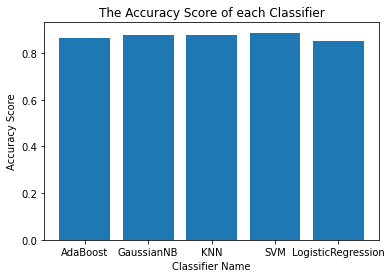

In [38]:
plt.bar(x=classifiers.keys(),height=clf_accuracy)
plt.title('The Accuracy Score of each Classifier')
plt.xlabel('Classifier Name')
plt.ylabel('Accuracy Score')
plt.show()

#### From graph we see that SVM has the highest Accuracy Score, so it will be our final model

## Hyperparameter tuning for the best model using GridSearchCV

In [39]:
# parameters grid of adaboost classifer
params_grid = {'C':[0.1,0.6,2,8]
              ,'kernel':['linear','poly','rbf']}
# score method
score = make_scorer(accuracy_score)
# extract best_estimator from gridsearch as it will be our best classifier
grid_search_object = GridSearchCV(estimator=svm_clf,param_grid=params_grid,scoring=score)
grid_fit = grid_search_object.fit(X_train,y_train)
best_clf = grid_fit.best_estimator_

## Predict the Test Data

In [40]:
# Test Data
X_test = test
y_pred = best_clf.predict(X_test)

## Convert predictions into a CSV file

In [41]:
# convert predictions into a dataframe
survived = pd.DataFrame(y_pred,columns=['Survived'])
## add predictions to the test data
test = pd.concat([test,survived],axis=1)
test = pd.concat([test,PassngerId],axis=1)

In [42]:
## create submission file
submission = pd.DataFrame(test[['PassengerId','Survived']],columns=['PassengerId','Survived'])
submission.to_csv('Submission.csv',index=False)